<a href="https://colab.research.google.com/github/Borislove/salary-analysis-643-py/blob/main/salary_analysis_643_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#------------Option---------
pd.options.display.expand_frame_repr = False

In [9]:
# ---------DATA-------------
url = 'https://raw.githubusercontent.com/Borislove/files/main/data/data.csv'
DATA = pd.read_csv(url, index_col=0)
DATA.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Образование,1240.0,1833.00,2927.00,3387.00,4203.00,5430.00,6983.0,8778.00,11317.00,13294.0,...,25862.00,26928.00,28088.00,30258.00,34361.00,37072.00,39563.00,43391.00,48400.00,54263.00
Здравоохранение и предоставление социальных услуг,1333.0,1960.00,3141.00,3663.00,4612.00,5906.00,8060.0,10037.00,13049.00,14820.0,...,27068.00,28179.00,29742.00,31980.00,40027.00,43122.00,49532.00,50690.00,55420.00,61486.00
Государственное управление и обеспечение военной безопасности; социальное страхование,2712.0,3755.00,5200.00,6914.00,7899.00,10959.00,13477.0,16896.00,21344.00,23960.0,...,42659.00,41916.00,43611.00,43500.00,47803.00,50991.00,54496.00,58620.00,63505.00,73861.00
Инфляция,20.2,18.58,15.06,11.99,11.74,10.91,9.0,11.87,13.28,8.8,...,11.36,12.91,5.38,2.52,4.27,3.05,4.91,8.39,11.92,7.42


In [10]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Образование to Инфляция
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    4 non-null      float64
 1   2001    4 non-null      float64
 2   2002    4 non-null      float64
 3   2003    4 non-null      float64
 4   2004    4 non-null      float64
 5   2005    4 non-null      float64
 6   2006    4 non-null      float64
 7   2007    4 non-null      float64
 8   2008    4 non-null      float64
 9   2009    4 non-null      float64
 10  2010    4 non-null      float64
 11  2011    4 non-null      float64
 12  2012    4 non-null      float64
 13  2013    4 non-null      float64
 14  2014    4 non-null      float64
 15  2015    4 non-null      float64
 16  2016    4 non-null      float64
 17  2017    4 non-null      float64
 18  2018    4 non-null      float64
 19  2019    4 non-null      float64
 20  2020    4 non-null      float64
 21  2021    4 non-null      float64

In [11]:
# размер сета
DATA.shape

(4, 24)

In [12]:
DATA.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1326.300000,1891.645000,2820.765000,3493.997500,4181.435000,5576.477500,7132.250000,8930.717500,11430.8200,13020.700000,...,23900.090000,24258.977500,25361.595000,26435.130000,30548.81750,32797.012500,35898.977500,38177.347500,41834.230000,47404.355000
std,1100.538396,1526.278261,2132.805356,2820.212973,3234.836276,4475.009527,5534.122597,6933.944275,8779.9548,9870.663596,...,17667.794335,17532.184598,18281.134667,18576.441872,21095.37765,22593.111359,24721.904531,26194.910465,28556.437501,32617.772503
min,20.200000,18.580000,15.060000,11.990000,11.740000,10.910000,9.000000,11.870000,13.2800,8.800000,...,11.360000,12.910000,5.380000,2.520000,4.27000,3.050000,4.910000,8.390000,11.920000,7.420000
25%,935.050000,1379.395000,2199.015000,2543.247500,3155.185000,4075.227500,5239.500000,6586.467500,8491.0700,9972.700000,...,19399.340000,20199.227500,21067.345000,22694.130000,25771.81750,27804.762500,29673.477500,32545.347500,36302.980000,40699.105000
50%,1286.500000,1896.500000,3034.000000,3525.000000,4407.500000,5668.000000,7521.500000,9407.500000,12183.0000,14057.000000,...,26465.000000,27553.500000,28915.000000,31119.000000,37194.00000,40097.000000,44547.500000,47040.500000,51910.000000,57874.500000
75%,1677.750000,2408.750000,3655.750000,4475.750000,5433.750000,7169.250000,9414.250000,11751.750000,15122.7500,17105.000000,...,30965.750000,31613.250000,33209.250000,34860.000000,41971.00000,45089.250000,50773.000000,52672.500000,57441.250000,64579.750000
max,2712.000000,3755.000000,5200.000000,6914.000000,7899.000000,10959.000000,13477.000000,16896.000000,21344.0000,23960.000000,...,42659.000000,41916.000000,43611.000000,43500.000000,47803.00000,50991.000000,54496.000000,58620.000000,63505.000000,73861.000000


In [13]:
#
education = DATA.values[0]
healthcare = DATA.values[1]
security = DATA.values[2]
inflation = DATA.values[3]
columns = DATA.columns
columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [14]:
txt = 'Средняя заработная плата в сфере: '
txt_education = 'Образование'
txt_healthcare = 'Здравоохранение и предоставление социальных услуг'
txt_security = 'Государственное управление и обеспечение военной безопасности; социальное страхование'
txt_inflation = 'Инфляция'

In [15]:
# Инфляция
DATA.iloc[-1]

2000    20.20
2001    18.58
2002    15.06
2003    11.99
2004    11.74
2005    10.91
2006     9.00
2007    11.87
2008    13.28
2009     8.80
2010     8.78
2011     6.10
2012     6.58
2013     6.45
2014    11.36
2015    12.91
2016     5.38
2017     2.52
2018     4.27
2019     3.05
2020     4.91
2021     8.39
2022    11.92
2023     7.42
Name: Инфляция, dtype: float64

In [16]:
# accounting for inflation
afi = (1- inflation / 100 )

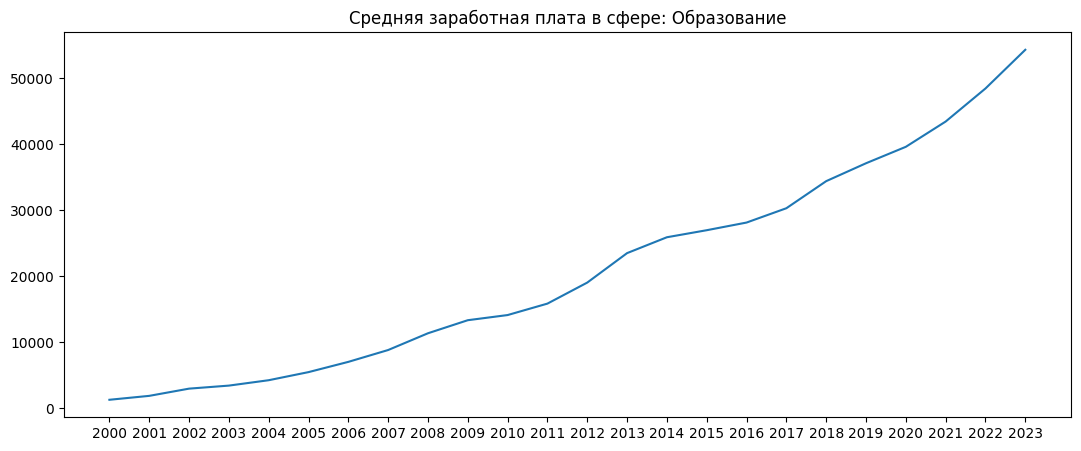

In [17]:
# Образование без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_education)
plt.plot(columns, education)
#plt.show()

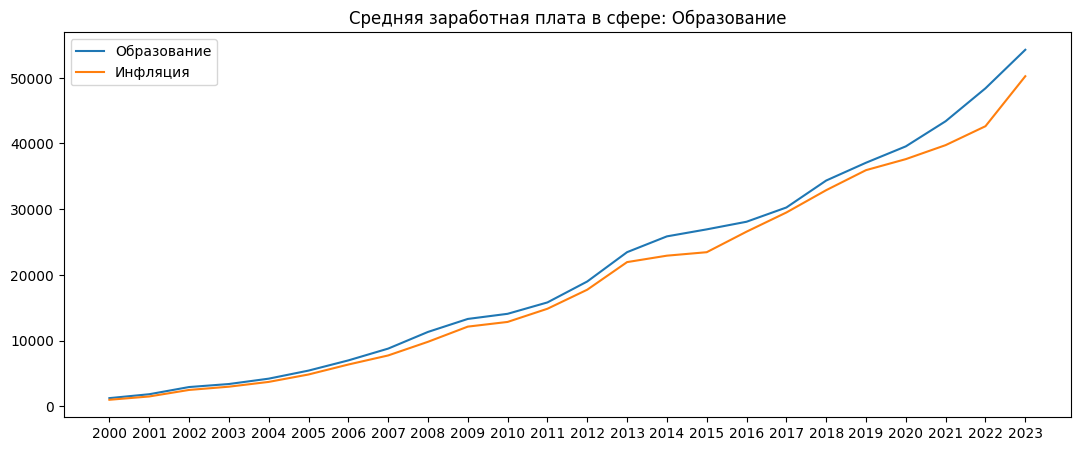

In [18]:
plt.figure(figsize=(13, 5))
plt.title(txt + txt_education)
plt.plot(columns, education)
plt.plot(columns, (1- inflation / 100 ) * education)
plt.legend([txt_education, txt_inflation])
plt.show()

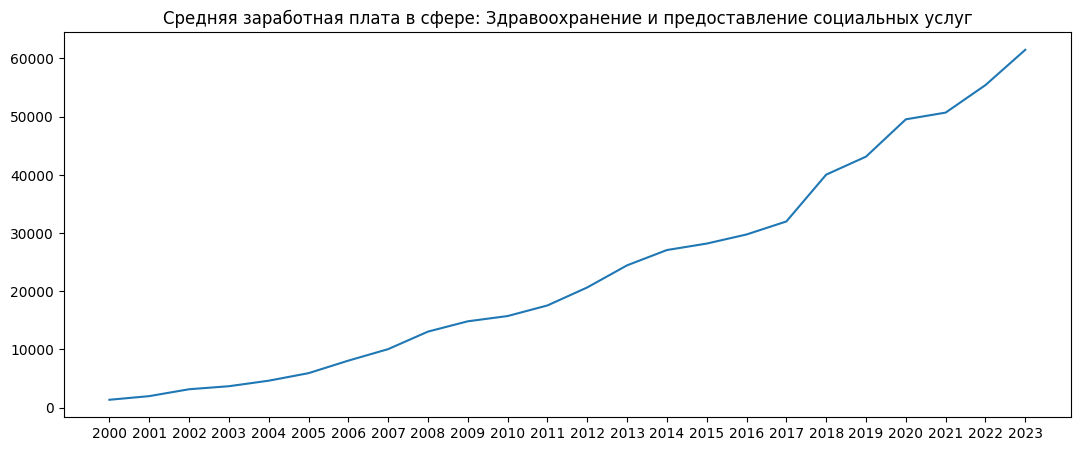

In [19]:
# Здравоохранение и предоставление социальных услуг без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_healthcare)
plt.plot(columns, healthcare)
plt.show()

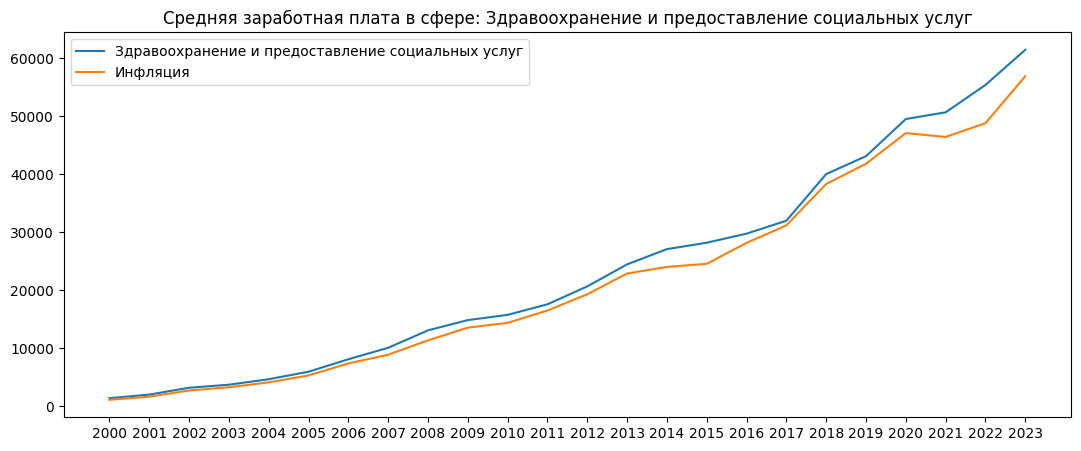

In [20]:
# Здравоохранение и предоставление социальных услуг без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_healthcare)
plt.plot(columns, healthcare)
plt.plot(columns, (1- inflation / 100 ) * healthcare)
plt.legend([txt_healthcare, txt_inflation])
plt.show()

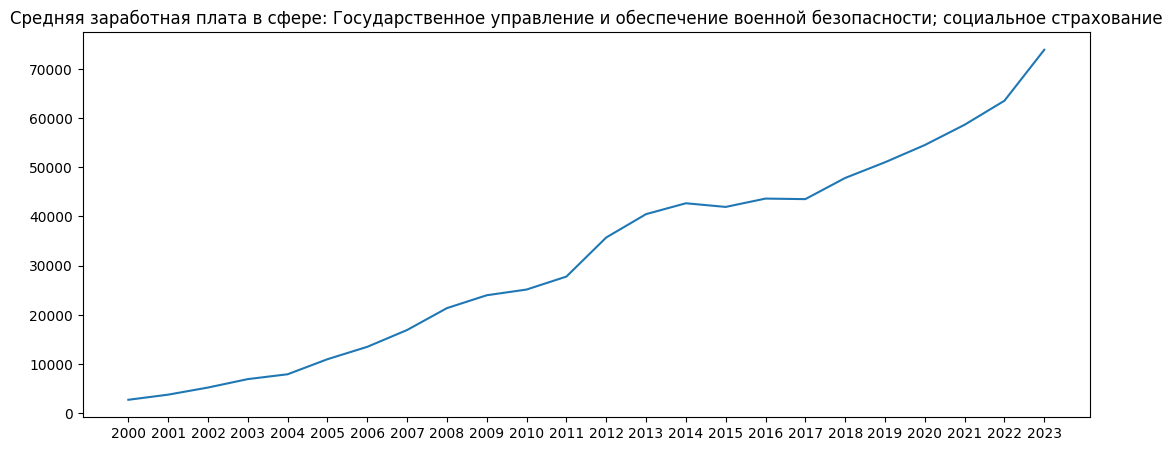

In [21]:
# Государственное управление и обеспечение военной безопасности; социальное страхование без учета инфляции
plt.figure(figsize=(13, 5))
plt.title(txt + txt_security)
plt.plot(columns, security)
plt.show()

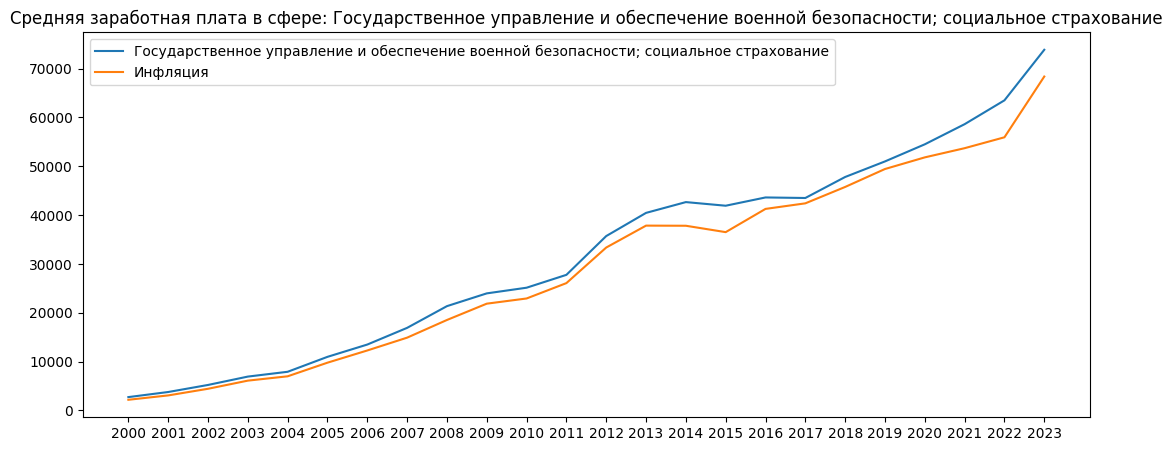

In [22]:
plt.figure(figsize=(13, 5))
plt.title(txt + txt_security)
plt.plot(columns, security)
plt.plot(columns, (1- inflation / 100 ) * security)
plt.legend([txt_security, txt_inflation])
plt.show()

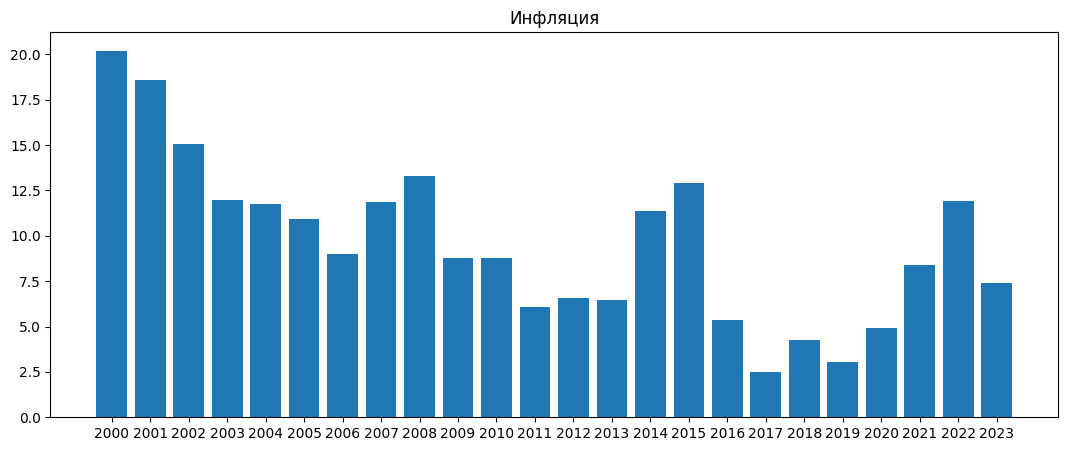

In [23]:
# инфляция
plt.figure(figsize=(13, 5))
plt.title(txt_inflation)
plt.bar(columns, inflation)
plt.show()

In [24]:
# попытка нарисовать в sns
# url_infl = 'https://raw.githubusercontent.com/Borislove/files/main/data/data.csv'
# DATA_INFLATION = pd.read_csv(url_infl, index_col=0)
# DATA_INFLATION = DATA_INFLATION.tail(1)


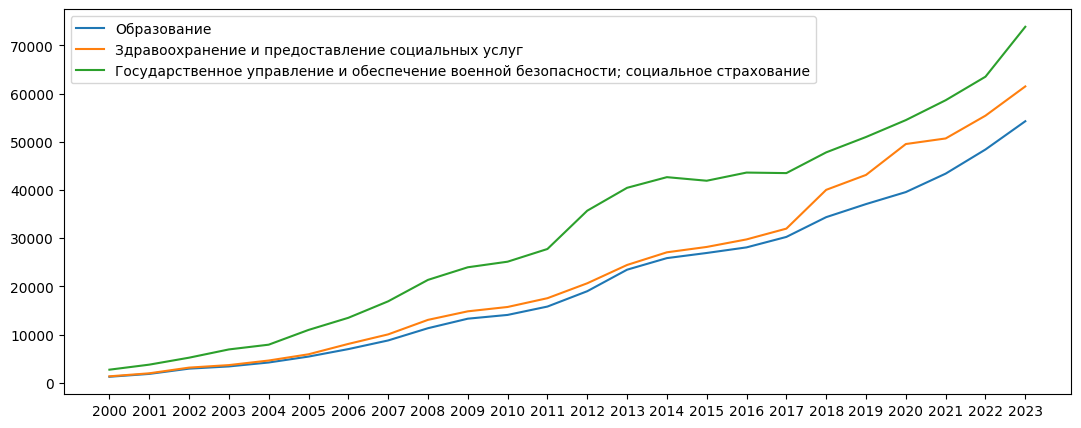

In [25]:
# общее
plt.figure(figsize=(13, 5))
plt.plot(columns, education)
plt.plot(columns, healthcare)
plt.plot(columns, security)
plt.legend([txt_education, txt_healthcare,txt_security])
plt.show()


In [26]:
DATA.index

Index(['Образование', 'Здравоохранение и предоставление социальных услуг',
       'Государственное управление и обеспечение военной безопасности; социальное страхование',
       'Инфляция'],
      dtype='object', name=' ')

In [27]:
education_sum = education.sum()
healthcare_sum = healthcare.sum()
security_sum = security.sum()
education_sum, healthcare_sum, security_sum

(499915.0, 562176.0, 763105.0)

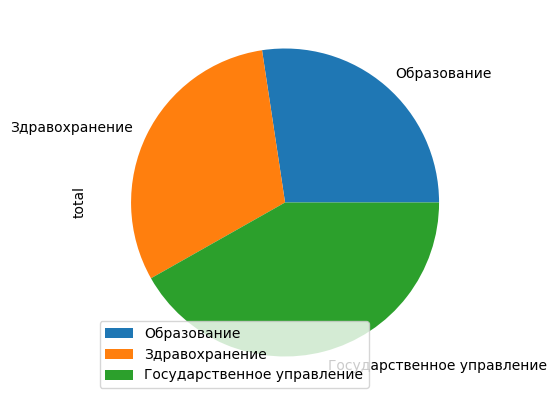

In [28]:
ed = education.sum()
he = healthcare.sum()
se = security.sum()
data = [    [ed],    [he],    [se]    ]

df = pd.DataFrame(data, columns=['total'], index=["Образование", "Здравохранение", "Государственное управление"])
plot = df.plot.pie(subplots=True, figsize=(5, 5))

In [29]:
# ОБРАЗОВАНИЕ
url_ed = 'https://raw.githubusercontent.com/Borislove/files/main/data/data.csv'
DATA_ED = pd.read_csv(url_ed, index_col=0)
DATA_ED = DATA_ED.drop(index=('Здравоохранение и предоставление социальных услуг'))
DATA_ED = DATA_ED.drop(index=('Государственное управление и обеспечение военной безопасности; социальное страхование'))
DATA_ED.head(1)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Образование,1240.0,1833.0,2927.0,3387.0,4203.0,5430.0,6983.0,8778.0,11317.0,13294.0,...,25862.0,26928.0,28088.0,30258.0,34361.0,37072.0,39563.0,43391.0,48400.0,54263.0


In [30]:
ed_infl = DATA_ED * (1- inflation / 100 )
ed_calc = ed_infl
ed_infl

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Образование,989.5200,1492.428600,2486.193800,2980.898700,3709.567800,4837.587000,6354.53,7736.051400,9814.102400,12124.1280,...,22924.076800,23451.595200,26576.865600,29495.498400,32893.785300,35941.304000,37620.456700,39750.495100,42630.720000,50236.685400
Инфляция,16.1196,15.127836,12.791964,10.552399,10.361724,9.719719,8.19,10.461031,11.516416,8.0256,...,10.069504,11.243319,5.090556,2.456496,4.087671,2.956975,4.668919,7.686079,10.499136,6.869436


array([<Axes: >], dtype=object)

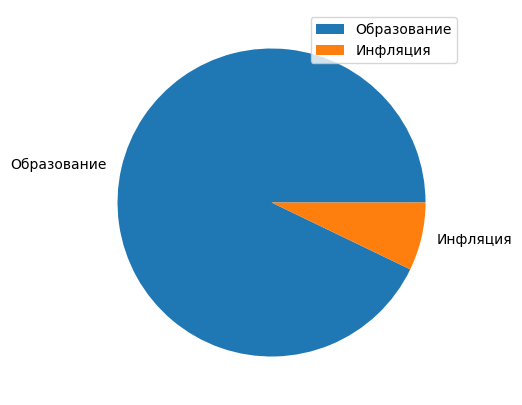

In [31]:
# образование
DATA_ED = DATA_ED.head(1)
#DATA_ED
ed = DATA_ED.values[0].sum()  # 499915.0
#DATA_ED.values[0]
education = DATA_ED.values[0]
test = DATA_ED * (1- inflation / 100 )
tt = test.values[0]
total = tt.sum()  # 461420.4442
total
result = ed - total # 38494.55579999997
result
data_ed = [[ed], [result]]
data_ed
data_ed_infl = pd.DataFrame(data_ed, columns=[''], index=["Образование", "Инфляция"])
data_ed_infl.plot.pie(subplots=True, figsize=(5, 5))

In [32]:
# Здравоохранение и предоставление социальных услуг
url_he = 'https://raw.githubusercontent.com/Borislove/files/main/data/data.csv'
DATA_HE = pd.read_csv(url_he, index_col=0)
DATA_HE = DATA_HE.drop(index=('Образование'))
DATA_HE = DATA_HE.drop(index=('Государственное управление и обеспечение военной безопасности; социальное страхование'))
DATA_HE.head(1)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Здравоохранение и предоставление социальных услуг,1333.0,1960.0,3141.0,3663.0,4612.0,5906.0,8060.0,10037.0,13049.0,14820.0,...,27068.0,28179.0,29742.0,31980.0,40027.0,43122.0,49532.0,50690.0,55420.0,61486.0


In [33]:
he_infl = DATA_HE * (1- inflation / 100 )
he_calc = he_infl
he_infl.head(1)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Здравоохранение и предоставление социальных услуг,1063.734,1595.832,2667.9654,3223.8063,4070.5512,5261.6554,7334.6,8845.6081,11316.0928,13515.84,...,23993.0752,24541.0911,28141.8804,31174.104,38317.8471,41806.779,47099.9788,46437.109,48813.936,56923.7388


In [34]:
# Здравоохранение
DATA_HE = DATA_HE.head(1)
he = DATA_HE.values[0].sum() # 562176.0
he_infl_total = he_infl.values[0].sum()
result_he = he - he_infl_total
he, he_infl_total, result_he

(562176.0, 519108.9191, 43067.0809)

array([<Axes: >], dtype=object)

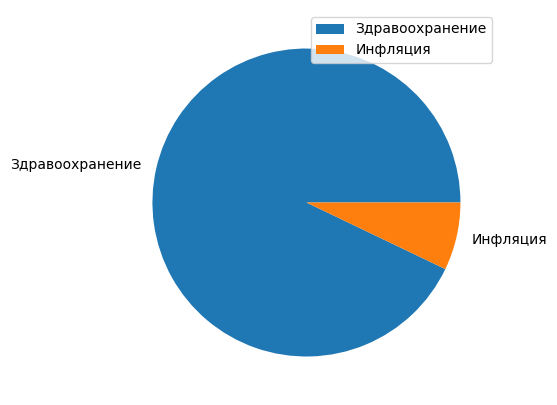

In [35]:
data_he = [[he], [result_he]]
data_he_infl = pd.DataFrame(data_he, columns=[''], index=["Здравоохранение", "Инфляция"])
data_he_infl.plot.pie(subplots=True, figsize=(5, 5))

In [36]:
# Государственное управление и обеспечение военной безопасности; социальное страхование

In [37]:
url_se = 'https://raw.githubusercontent.com/Borislove/files/main/data/data.csv'
DATA_SE = pd.read_csv(url_se, index_col=0)
DATA_SE = DATA_SE.drop(index=('Образование'))
DATA_SE = DATA_SE.drop(index=('Здравоохранение и предоставление социальных услуг'))
DATA_SE.head(1)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Государственное управление и обеспечение военной безопасности; социальное страхование,2712.0,3755.0,5200.0,6914.0,7899.0,10959.0,13477.0,16896.0,21344.0,23960.0,...,42659.0,41916.0,43611.0,43500.0,47803.0,50991.0,54496.0,58620.0,63505.0,73861.0


In [38]:
se_infl = DATA_SE * (1- inflation / 100 )
se_calc = se_infl
se_infl.head(1)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
Государственное управление и обеспечение военной безопасности; социальное страхование,2164.176,3057.321,4416.88,6085.0114,6971.6574,9763.3731,12264.07,14890.4448,18509.5168,21851.52,...,37812.9376,36504.6444,41264.7282,42403.8,45761.8119,49435.7745,51820.2464,53701.782,55935.204,68380.5138


In [39]:
# гос упр
DATA_SE = DATA_SE.head(1)
se = DATA_SE.values[0].sum() # 763105.0
se_infl_total = se_infl.values[0].sum() # 703165
result_se = se - se_infl_total #  59939
se, se_infl_total, result_se

(763105.0, 703165.5872000001, 59939.41279999993)

array([<Axes: >], dtype=object)

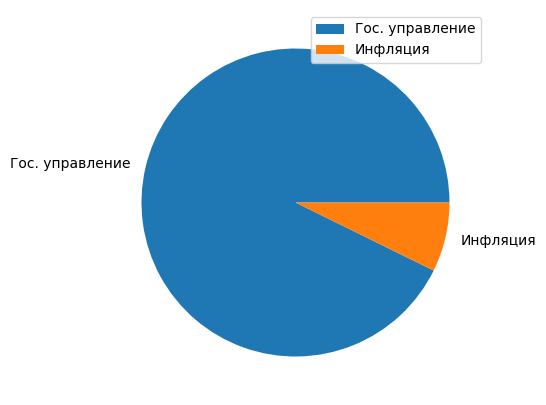

In [40]:
data_se = [[se], [result_se]]
data_se_infl = pd.DataFrame(data_se, columns=[''], index=["Гос. управление", "Инфляция"])
data_se_infl.plot.pie(subplots=True, figsize=(5, 5))

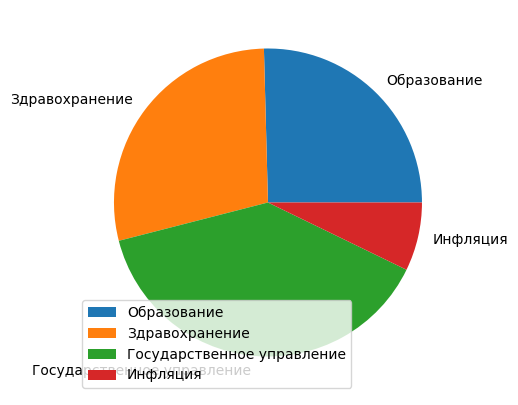

In [41]:
total_infl = result + result_he + result_se
total_infl

ed = education.sum()
he = healthcare.sum()
se = security.sum()
data_infl = [    [ed],    [he],    [se] , [total_infl]   ]

df = pd.DataFrame(data_infl, columns=[''], index=["Образование", "Здравохранение", "Государственное управление", 'Инфляция'])
plot = df.plot.pie(subplots=True, figsize=(5, 5))

Примерное расположение линий дополнительного анализа


In [42]:
# ВВП
url = 'https://raw.githubusercontent.com/Borislove/files/main/data/VVP.csv'
DATA1 = pd.read_csv(url, index_col=0)
DATA1
#DATA1.values

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
ВВП,7.306,8.944,10.831,13.208,17.027,21.61,26.917,33.248,41.277,38.807,...,79.03,83.087,86.043,91.843,103.862,109.608,107.315,109.608,116.224,119.369


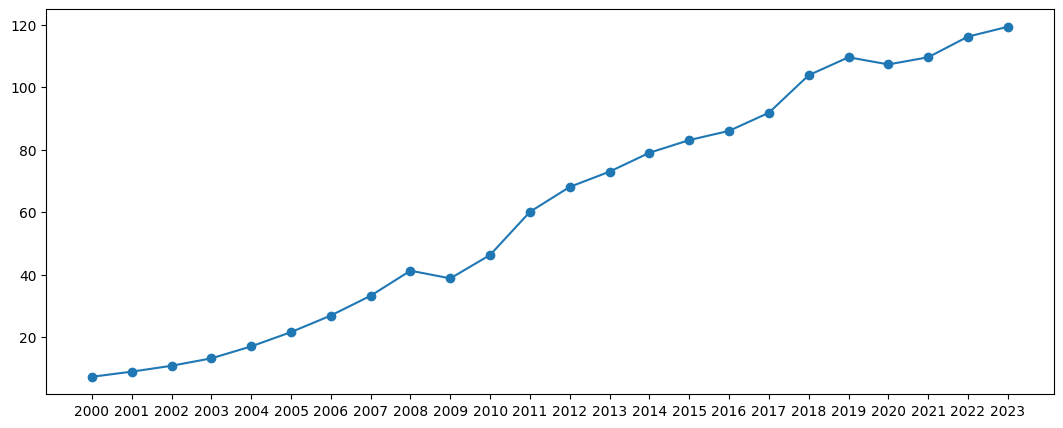

In [43]:

plt.figure(figsize=(13,5))
plt.plot(DATA1.columns, DATA1.values[0])
#plt.show()
plt.scatter(DATA1.columns, DATA1.values[0]);

In [44]:
# безработица
url = 'https://raw.githubusercontent.com/Borislove/files/main/data/joblessness.csv'
DATA2 = pd.read_csv(url, index_col=0)
DATA2
DATA2.columns
DATA2.values

array([[10.558,  8.942,  8.042,  8.233,  7.733,  7.15 ,  7.05 ,  6.025,
         6.233,  8.242,  7.358,  6.508,  5.45 ,  5.5  ,  5.158,  5.575,
         5.525,  5.2  ,  4.8  ,  4.6  ,  5.783,  5.6  ,  5.4  ,  5.383]])

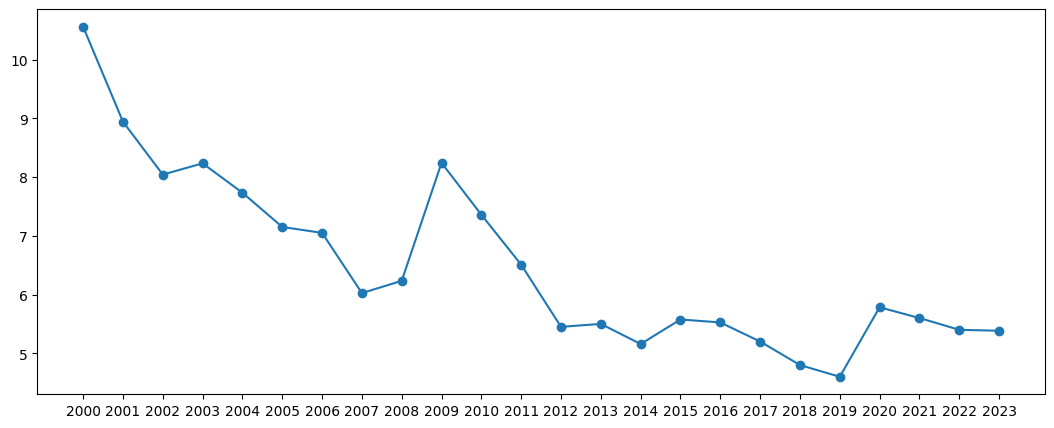

In [45]:
plt.figure(figsize=(13,5))
plt.plot(DATA2.columns, DATA2.values[0])
plt.scatter(DATA2.columns, DATA2.values[0]);


In [46]:
# бедность
url = 'https://raw.githubusercontent.com/Borislove/files/main/data/poverty1.csv'
DATA3 = pd.read_csv(url, index_col=0)
DATA3
#DATA3.columns
DATA3.values

array([[ 1210,  1500,  1808,  2112,  2376,  3018,  3422,  3847,  4593,
         5153,  5688,  6369,  6510,  7306,  8050,  9701,  9828, 10088,
        10287, 10890, 11312, 11908, 13545, 14201]])

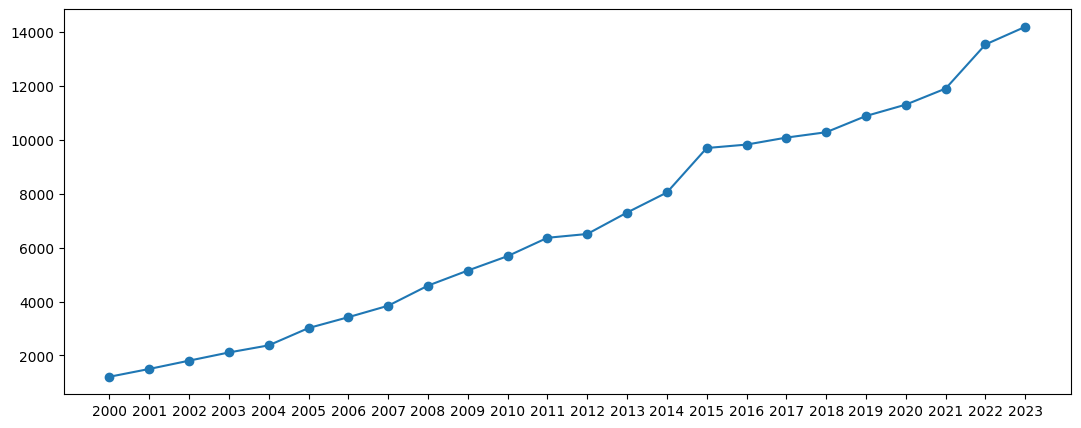

In [47]:
plt.figure(figsize=(13,5))
plt.plot(DATA3.columns, DATA3.values[0])
plt.scatter(DATA3.columns, DATA3.values[0]);

In [48]:
DATA_DOP = pd.concat([DATA1,DATA2,DATA3])
DATA_DOP

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
ВВП,7.306,8.944,10.831,13.208,17.027,21.61,26.917,33.248,41.277,38.807,...,79.030,83.087,86.043,91.843,103.862,109.608,107.315,109.608,116.224,119.369
Безработица,10.558,8.942,8.042,8.233,7.733,7.15,7.050,6.025,6.233,8.242,...,5.158,5.575,5.525,5.200,4.800,4.600,5.783,5.600,5.400,5.383
Граница бедности,1210.000,1500.000,1808.000,2112.000,2376.000,3018.00,3422.000,3847.000,4593.000,5153.000,...,8050.000,9701.000,9828.000,10088.000,10287.000,10890.000,11312.000,11908.000,13545.000,14201.000


In [49]:
#
# DATA # DATA1 ввп # DATA2 безработица # DATA3 бедность
DATA_REST = pd.concat([DATA* (1- inflation / 100 ),DATA1,DATA2,DATA3])
#DATA_REST = pd.concat([he_calc, ed_calc,se_calc, DATA_DOP])

DATA_REST

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Образование,989.5200,1492.428600,2486.193800,2980.898700,3709.567800,4837.587000,6354.530,7736.051400,9814.102400,12124.1280,...,22924.076800,23451.595200,26576.865600,29495.498400,32893.785300,35941.304000,37620.456700,39750.495100,42630.720000,50236.685400
Здравоохранение и предоставление социальных услуг,1063.7340,1595.832000,2667.965400,3223.806300,4070.551200,5261.655400,7334.600,8845.608100,11316.092800,13515.8400,...,23993.075200,24541.091100,28141.880400,31174.104000,38317.847100,41806.779000,47099.978800,46437.109000,48813.936000,56923.738800
Государственное управление и обеспечение военной безопасности; социальное страхование,2164.1760,3057.321000,4416.880000,6085.011400,6971.657400,9763.373100,12264.070,14890.444800,18509.516800,21851.5200,...,37812.937600,36504.644400,41264.728200,42403.800000,45761.811900,49435.774500,51820.246400,53701.782000,55935.204000,68380.513800
Инфляция,16.1196,15.127836,12.791964,10.552399,10.361724,9.719719,8.190,10.461031,11.516416,8.0256,...,10.069504,11.243319,5.090556,2.456496,4.087671,2.956975,4.668919,7.686079,10.499136,6.869436
ВВП,7.3060,8.944000,10.831000,13.208000,17.027000,21.610000,26.917,33.248000,41.277000,38.8070,...,79.030000,83.087000,86.043000,91.843000,103.862000,109.608000,107.315000,109.608000,116.224000,119.369000
Безработица,10.5580,8.942000,8.042000,8.233000,7.733000,7.150000,7.050,6.025000,6.233000,8.2420,...,5.158000,5.575000,5.525000,5.200000,4.800000,4.600000,5.783000,5.600000,5.400000,5.383000
Граница бедности,1210.0000,1500.000000,1808.000000,2112.000000,2376.000000,3018.000000,3422.000,3847.000000,4593.000000,5153.0000,...,8050.000000,9701.000000,9828.000000,10088.000000,10287.000000,10890.000000,11312.000000,11908.000000,13545.000000,14201.000000


In [50]:
DATA_REST = DATA_REST.T
#DATA_REST
#DATA_REST.columns

DATA_FULL = DATA_REST.rename(columns={'Здравоохранение и предоставление социальных услуг': 'Здравоохранение',
                                      'Государственное управление и обеспечение военной безопасности; социальное страхование': 'Гос.управление'})
#DATA_FULL.drop(['Инфляция'], axis=1)
#DATA_FULL = DATA_FULL.T

#DATA_FULL = DATA_FULL.T
DATA_FULL
DATA_FULL = DATA_FULL.drop(['Инфляция'], axis=1)
DATA_FULL





,Образование,Здравоохранение,Гос.управление,ВВП,Безработица,Граница бедности
2000,989.5200,1063.7340,2164.1760,7.306,10.558,1210.0
2001,1492.4286,1595.8320,3057.3210,8.944,8.942,1500.0
2002,2486.1938,2667.9654,4416.8800,10.831,8.042,1808.0
2003,2980.8987,3223.8063,6085.0114,13.208,8.233,2112.0
2004,3709.5678,4070.5512,6971.6574,17.027,7.733,2376.0
2005,4837.5870,5261.6554,9763.3731,21.610,7.150,3018.0
2006,6354.5300,7334.6000,12264.0700,26.917,7.050,3422.0
2007,7736.0514,8845.6081,14890.4448,33.248,6.025,3847.0
2008,9814.1024,11316.0928,18509.5168,41.277,6.233,4593.0
2009,12124.1280,13515.8400,21851.5200,38.807,8.242,5153.0


In [51]:
DATA_FULL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Образование       24 non-null     float64
 1   Здравоохранение   24 non-null     float64
 2   Гос.управление    24 non-null     float64
 3   ВВП               24 non-null     float64
 4   Безработица       24 non-null     float64
 5   Граница бедности  24 non-null     float64
dtypes: float64(6)
memory usage: 1.9+ KB


In [52]:
DATA_FULL.describe()

,Образование,Здравоохранение,Гос.управление,ВВП,Безработица,Граница бедности
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,19225.851842,21629.538296,29298.566133,61.361500,6.502000,6863.416667
std,14849.300609,17204.049340,19481.035464,38.817135,1.500814,4038.166888
min,989.520000,1063.734000,2164.176000,7.306000,4.600000,1210.000000
25%,5975.294250,6816.363850,11638.895775,25.590250,5.437500,3321.000000
50%,16294.890000,17878.788600,29707.379100,64.108500,5.904000,6439.500000
75%,30345.070125,32960.039775,43243.302975,94.847750,7.451750,10137.750000
max,50236.685400,56923.738800,68380.513800,119.369000,10.558000,14201.000000


<BarContainer object of 24 artists>

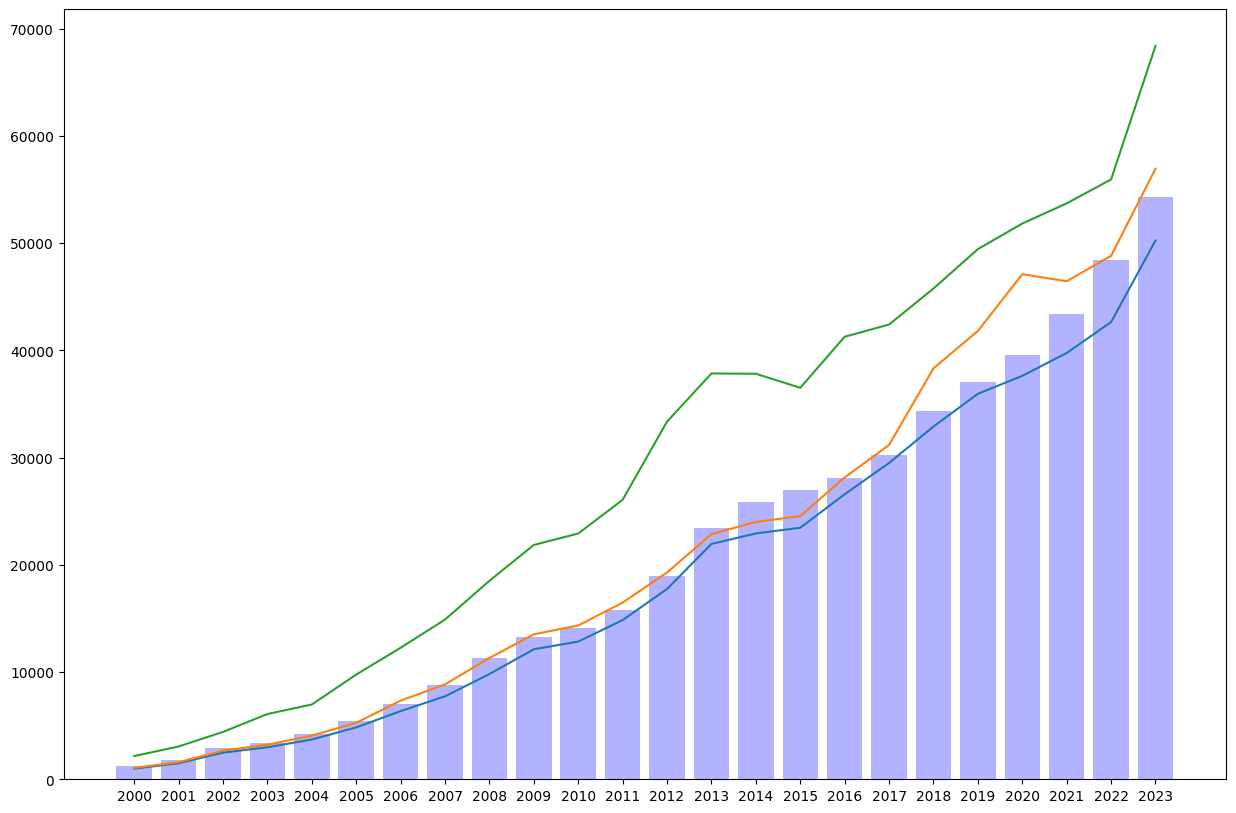

In [53]:
plt.figure(figsize=(15,10))

DATA_FULL = DATA_FULL.T
# основные

plt.plot(DATA_FULL.columns, DATA_FULL.values[0]);
plt.plot(DATA_FULL.columns, DATA_FULL.values[1]);
plt.plot(DATA_FULL.columns, DATA_FULL.values[2]);
#plt.legend(['Образование', 'Здравоохранение','Гос.управление']) # что то не работает тут
# infl
plt.bar(DATA.tail(-1).columns, (DATA.values[0]), color = 'Blue', alpha = 0.3)


In [54]:
DATA_DOP

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
ВВП,7.306,8.944,10.831,13.208,17.027,21.61,26.917,33.248,41.277,38.807,...,79.030,83.087,86.043,91.843,103.862,109.608,107.315,109.608,116.224,119.369
Безработица,10.558,8.942,8.042,8.233,7.733,7.15,7.050,6.025,6.233,8.242,...,5.158,5.575,5.525,5.200,4.800,4.600,5.783,5.600,5.400,5.383
Граница бедности,1210.000,1500.000,1808.000,2112.000,2376.000,3018.00,3422.000,3847.000,4593.000,5153.000,...,8050.000,9701.000,9828.000,10088.000,10287.000,10890.000,11312.000,11908.000,13545.000,14201.000


In [ ]:
# TEST , не правильно!
# plt.figure(figsize=(15,10))

# DATA_FULL = DATA_FULL.T
# # основные

# plt.plot(DATA_FULL.columns, DATA_FULL.values[0]);
# plt.plot(DATA_FULL.columns, DATA_FULL.values[1]);
# plt.plot(DATA_FULL.columns, DATA_FULL.values[2]);
# #plt.legend(['Образование', 'Здравоохранение','Гос.управление']) # что то не работает тут
# # infl
# plt.bar(DATA.tail(-1).columns, (DATA.values[0]), color = 'Blue', alpha = 0.3) # инфл


# # ---------------------------------------------
# # доп
# plt.scatter(DATA_FULL.columns, DATA_FULL.values[3]*100);  #ввп %млрд
# plt.scatter(DATA_FULL.columns, DATA_FULL.values[4]+2100); # безработица %
# plt.scatter(DATA_FULL.columns, DATA_FULL.values[5]+2000); # бедность %
# plt.show()

#DATA_FULL.values[3] # ввп

#plt.scatter(DATA_FULL.columns, DATA_FULL.values[5]);

# show не забыть?
#plt.xlabel('Образование');
#plt.ylabel('Инфляция');

<Axes: >

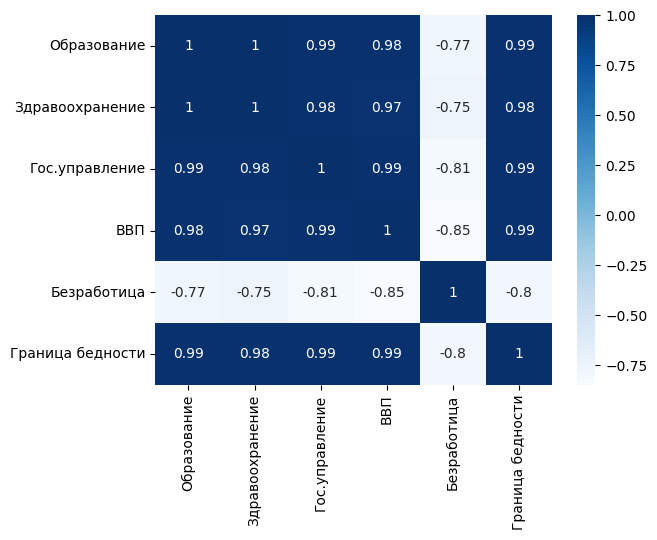

In [56]:
# Корреляция Пирсона
corr = DATA_FULL.corr(numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

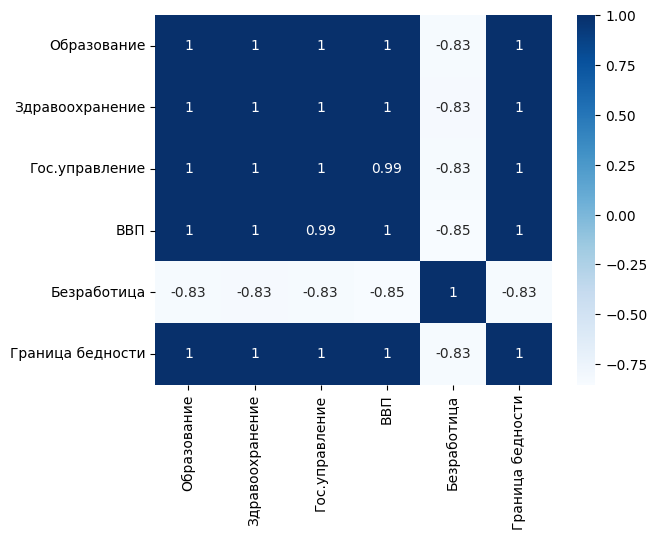

In [57]:
corr_s = DATA_FULL.corr(method='spearman', numeric_only=True)

sns.heatmap(corr_s, cmap="Blues", annot=True)

<Axes: >

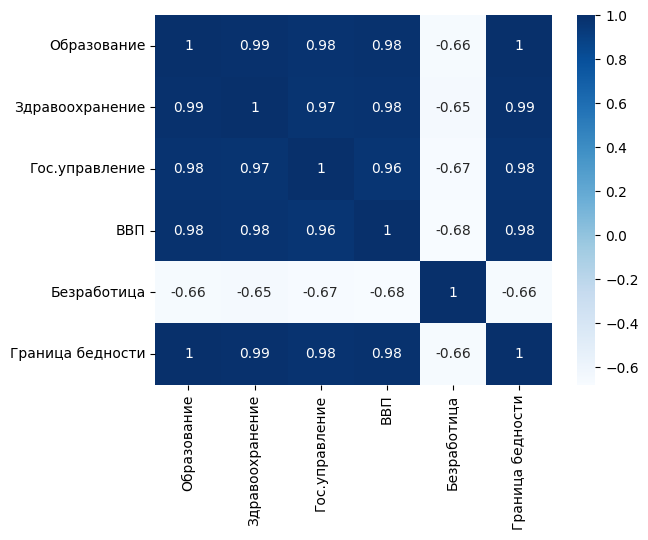

In [58]:
corr_k = DATA_FULL.corr(method='kendall', numeric_only=True)

sns.heatmap(corr_k, cmap="Blues", annot=True)

In [59]:
DATA_FULL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Образование       24 non-null     float64
 1   Здравоохранение   24 non-null     float64
 2   Гос.управление    24 non-null     float64
 3   ВВП               24 non-null     float64
 4   Безработица       24 non-null     float64
 5   Граница бедности  24 non-null     float64
dtypes: float64(6)
memory usage: 1.9+ KB


In [60]:
DATA_FULL.dtypes

Образование         float64
Здравоохранение     float64
Гос.управление      float64
ВВП                 float64
Безработица         float64
Граница бедности    float64
dtype: object

In [128]:
data_real = DATA.head(3)
data_real = data_real*afi
data_real = data_real.T
data_real = data_real.rename(columns={'Здравоохранение и предоставление социальных услуг': 'Здравоохранение',
                                      'Государственное управление и обеспечение военной безопасности; социальное страхование': 'Гос.управление'})
data_real

,Образование,Здравоохранение,Гос.управление
2000,989.5200,1063.7340,2164.1760
2001,1492.4286,1595.8320,3057.3210
2002,2486.1938,2667.9654,4416.8800
2003,2980.8987,3223.8063,6085.0114
2004,3709.5678,4070.5512,6971.6574
2005,4837.5870,5261.6554,9763.3731
2006,6354.5300,7334.6000,12264.0700
2007,7736.0514,8845.6081,14890.4448
2008,9814.1024,11316.0928,18509.5168
2009,12124.1280,13515.8400,21851.5200


In [163]:
data_previous = data_real
data_previous = data_previous.shift(1)
data_previous = data_previous.rename(columns = {'Образование': 'Образование пред.', 'Здравоохранение': 'Здравоохранение пред.', 'Гос.управление' : 'Гос.упр. пред.'})
data_previous

,Образование пред.,Здравоохранение пред.,Гос.упр. пред.
2000,NaN,NaN,NaN
2001,989.5200,1063.7340,2164.1760
2002,1492.4286,1595.8320,3057.3210
2003,2486.1938,2667.9654,4416.8800
2004,2980.8987,3223.8063,6085.0114
2005,3709.5678,4070.5512,6971.6574
2006,4837.5870,5261.6554,9763.3731
2007,6354.5300,7334.6000,12264.0700
2008,7736.0514,8845.6081,14890.4448
2009,9814.1024,11316.0928,18509.5168


In [171]:
data_general = pd.concat([data_real, data_previous], axis=1)
data_general

,Образование,Здравоохранение,Гос.управление,Образование пред.,Здравоохранение пред.,Гос.упр. пред.
2000,989.5200,1063.7340,2164.1760,NaN,NaN,NaN
2001,1492.4286,1595.8320,3057.3210,989.5200,1063.7340,2164.1760
2002,2486.1938,2667.9654,4416.8800,1492.4286,1595.8320,3057.3210
2003,2980.8987,3223.8063,6085.0114,2486.1938,2667.9654,4416.8800
2004,3709.5678,4070.5512,6971.6574,2980.8987,3223.8063,6085.0114
2005,4837.5870,5261.6554,9763.3731,3709.5678,4070.5512,6971.6574
2006,6354.5300,7334.6000,12264.0700,4837.5870,5261.6554,9763.3731
2007,7736.0514,8845.6081,14890.4448,6354.5300,7334.6000,12264.0700
2008,9814.1024,11316.0928,18509.5168,7736.0514,8845.6081,14890.4448
2009,12124.1280,13515.8400,21851.5200,9814.1024,11316.0928,18509.5168


In [220]:
data_general['ed_increase'] = (data_general['Образование'] - data_general['Образование пред.'])
data_general['he_increase'] = (data_general['Здравоохранение'] -data_general['Здравоохранение пред.'])
data_general['se_increase'] = (data_general['Гос.управление'] -data_general['Гос.упр. пред.'])
data_general

,Образование,Здравоохранение,Гос.управление,Образование пред.,Здравоохранение пред.,Гос.упр. пред.,ed_increase,he_increase,se_increase
2000,989.5200,1063.7340,2164.1760,NaN,NaN,NaN,NaN,NaN,NaN
2001,1492.4286,1595.8320,3057.3210,989.5200,1063.7340,2164.1760,502.9086,532.0980,893.1450
2002,2486.1938,2667.9654,4416.8800,1492.4286,1595.8320,3057.3210,993.7652,1072.1334,1359.5590
2003,2980.8987,3223.8063,6085.0114,2486.1938,2667.9654,4416.8800,494.7049,555.8409,1668.1314
2004,3709.5678,4070.5512,6971.6574,2980.8987,3223.8063,6085.0114,728.6691,846.7449,886.6460
2005,4837.5870,5261.6554,9763.3731,3709.5678,4070.5512,6971.6574,1128.0192,1191.1042,2791.7157
2006,6354.5300,7334.6000,12264.0700,4837.5870,5261.6554,9763.3731,1516.9430,2072.9446,2500.6969
2007,7736.0514,8845.6081,14890.4448,6354.5300,7334.6000,12264.0700,1381.5214,1511.0081,2626.3748
2008,9814.1024,11316.0928,18509.5168,7736.0514,8845.6081,14890.4448,2078.0510,2470.4847,3619.0720
2009,12124.1280,13515.8400,21851.5200,9814.1024,11316.0928,18509.5168,2310.0256,2199.7472,3342.0032


In [221]:
data_diff = data_general
data_diff = data_diff.T
data_diff = data_diff.tail(3)
#data_diff = data_diff.T
data_diff

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,,,,,,,,,,,,,,,,,,,,,
ed_increase,NaN,502.9086,993.7652,494.7049,728.6691,1128.0192,1516.9430,1381.5214,2078.0510,2310.0256,...,979.1178,527.5184,3125.2704,2918.6328,3398.2869,3047.5187,1679.1527,2130.0384,2880.2249,7605.9654
he_increase,NaN,532.0980,1072.1334,555.8409,846.7449,1191.1042,2072.9446,1511.0081,2470.4847,2199.7472,...,1130.3907,548.0159,3600.7893,3032.2236,7143.7431,3488.9319,5293.1998,-662.8698,2376.8270,8109.8028
se_increase,NaN,893.1450,1359.5590,1668.1314,886.6460,2791.7157,2500.6969,2626.3748,3619.0720,3342.0032,...,-27.1019,-1308.2932,4760.0838,1139.0718,3358.0119,3673.9626,2384.4719,1881.5356,2233.4220,12445.3098


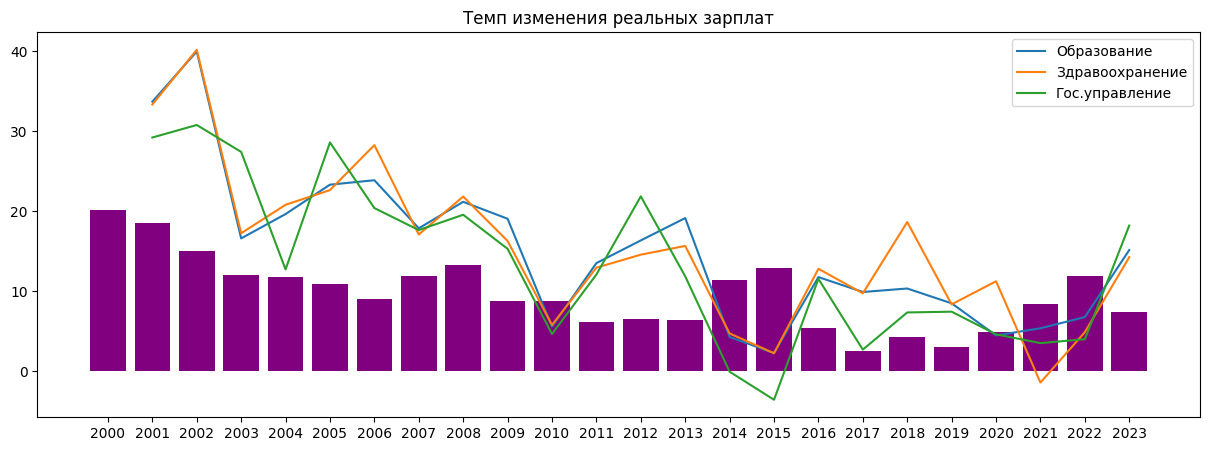

In [232]:
plt.figure(figsize=(15, 5))
plt.title("Темп изменения реальных зарплат")
#plt.plot(data_diff.columns, data_diff.values[0])
#plt.plot(data_diff.columns, data_diff.values[1])
#plt.plot(data_diff.columns, data_diff.values[2])
plt.plot(data_diff.columns, (1-(data_general['Образование пред.']/data_general['Образование']))*100)
plt.plot(data_diff.columns, (1-(data_general['Здравоохранение пред.']/data_general['Здравоохранение']))*100)
plt.plot(data_diff.columns, (1-(data_general['Гос.упр. пред.']/data_general['Гос.управление']))*100)
plt.bar(columns, inflation, color = 'purple')
plt.legend(['Образование','Здравоохранение','Гос.управление'])
